In [1]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


In [2]:
# Specify filepaths and filenames.
filepath = '/home/jovyan/ML_MB_Norway_data/'
filename = '2023-06-01_stake_mb_norway_cleaned_ids_latlon_wattributes_climate.csv'

# Load data.
data = pd.read_csv(filepath + filename)

data
data.columns

Index(['RGIID', 'GLIMSID', 'BREID', 'utm_zone', 'utm_east_approx',
       'utm_north_approx', 'altitude_approx', 'location_description',
       'location_id', 'stake_no',
       ...
       'tp_des', 'tp_jan', 'tp_feb', 'tp_mar', 'tp_apr', 'tp_may', 'tp_jun',
       'tp_jul', 'tp_aug', 'tp_sep'],
      dtype='object', length=204)

In [3]:
# Make year column
data['year']=pd.to_datetime(data['dt_curr_year_max_date'].astype('string'), format="%d.%m.%Y %H:%M")
data['year'] = data.year.dt.year.astype('Int64')

In [4]:
# Get data for Nigardsbreen
glacier_data_all = data.loc[data['RGIID']=='RGI60-08.01126']

glacier_data_all
# 950 point measurements

,RGIID,GLIMSID,BREID,utm_zone,utm_east_approx,utm_north_approx,altitude_approx,location_description,location_id,stake_no,...,tp_jan,tp_feb,tp_mar,tp_apr,tp_may,tp_jun,tp_jul,tp_aug,tp_sep,year
1930,RGI60-08.01126,G007099E61715N,2297,32,402750.0,6841500.0,990.0,NaN,N1000,N1000,...,0.003445,0.003761,0.003825,0.004330,0.003294,0.003513,0.003269,0.005247,0.008278,1991
1931,RGI60-08.01126,G007099E61715N,2297,32,402750.0,6841500.0,990.0,NaN,N1000,N1000,...,0.005719,0.015104,0.005939,0.001753,0.003413,0.005560,0.004863,0.006438,0.003316,1998
1932,RGI60-08.01126,G007099E61715N,2297,32,402750.0,6841500.0,990.0,NaN,N1000,N1000,...,0.012997,0.011049,0.006357,0.004072,0.003126,0.008577,0.003506,0.005019,0.005079,2000
1933,RGI60-08.01126,G007099E61715N,2297,32,402750.0,6841500.0,990.0,NaN,N1000,N100000,...,0.001720,0.004909,0.002112,0.004616,0.003036,0.004256,0.005699,0.006093,0.002317,2001
1934,RGI60-08.01126,G007099E61715N,2297,32,402750.0,6841500.0,990.0,NaN,N1000,N100002,...,0.006165,0.007848,0.007098,0.001808,0.002955,0.005540,0.005827,0.003137,0.004228,2002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,RGI60-08.01126,G007099E61715N,2297,32,401670.0,6847020.0,1800.0,NaN,N99,N9968,...,0.001482,0.001709,0.003372,0.002184,0.002967,0.003059,0.007892,0.003663,0.006336,1970
2876,RGI60-08.01126,G007099E61715N,2297,32,400520.0,6842250.0,1555.0,NaN,NaN,NA63,...,0.002619,0.001372,0.001987,0.002171,0.004079,0.002198,0.006389,0.005554,0.009834,1963
2877,RGI60-08.01126,G007099E61715N,2297,32,400350.0,6842570.0,1579.0,NaN,NC,NC63,...,0.002619,0.001372,0.001987,0.002171,0.004079,0.002198,0.006389,0.005554,0.009834,1963
2878,RGI60-08.01126,G007099E61715N,2297,32,400260.0,6840930.0,1612.0,NaN,NF,NF62,...,0.008896,0.008417,0.001199,0.001869,0.001849,0.004311,0.001448,0.006092,0.005234,1962


In [5]:
# Select columns

base_cols = ['balance_netto','year','lat','lon','altitude','aspect','slope','slope_factor']
temp_cols = ['t2m_oct','t2m_nov','t2m_des','t2m_jan','t2m_feb','t2m_mar','t2m_apr','t2m_may','t2m_jun','t2m_jul','t2m_aug','t2m_sep']
prec_cols = ['tp_oct','tp_nov','tp_des','tp_jan','tp_feb','tp_mar','tp_apr','tp_may','tp_jun','tp_jul','tp_aug','tp_sep']

cols = [y for x in [base_cols, temp_cols, prec_cols] for y in x]
cols

['balance_netto',
 'year',
 'lat',
 'lon',
 'altitude',
 'aspect',
 'slope',
 'slope_factor',
 't2m_oct',
 't2m_nov',
 't2m_des',
 't2m_jan',
 't2m_feb',
 't2m_mar',
 't2m_apr',
 't2m_may',
 't2m_jun',
 't2m_jul',
 't2m_aug',
 't2m_sep',
 'tp_oct',
 'tp_nov',
 'tp_des',
 'tp_jan',
 'tp_feb',
 'tp_mar',
 'tp_apr',
 'tp_may',
 'tp_jun',
 'tp_jul',
 'tp_aug',
 'tp_sep']

In [6]:
# Select columns for Nigardsbreen
glacier_data = glacier_data_all[cols]

# Reset index of new dataframe
glacier_data.reset_index(drop=True, inplace=True)

glacier_data

,balance_netto,year,lat,lon,altitude,aspect,slope,slope_factor,t2m_oct,t2m_nov,...,tp_des,tp_jan,tp_feb,tp_mar,tp_apr,tp_may,tp_jun,tp_jul,tp_aug,tp_sep
0,-4.11,1991,61.694315,7.161649,974.0,2.465503,0.152608,3.089254,270.932251,265.721527,...,0.007378,0.003445,0.003761,0.003825,0.004330,0.003294,0.003513,0.003269,0.005247,0.008278
1,-3.96,1998,61.694304,7.161498,1000.0,2.333727,0.143458,3.206009,268.193298,264.783997,...,0.003372,0.005719,0.015104,0.005939,0.001753,0.003413,0.005560,0.004863,0.006438,0.003316
2,-3.70,2000,61.696900,7.158885,1019.0,2.962544,0.131003,3.385560,269.597687,269.089081,...,0.005705,0.012997,0.011049,0.006357,0.004072,0.003126,0.008577,0.003506,0.005019,0.005079
3,-4.48,2001,61.694526,7.161315,974.0,2.333727,0.143458,3.206009,273.114014,265.902954,...,0.002565,0.001720,0.004909,0.002112,0.004616,0.003036,0.004256,0.005699,0.006093,0.002317
4,-5.00,2002,61.693602,7.162674,962.0,2.401391,0.163659,2.962348,272.787598,265.874878,...,0.003626,0.006165,0.007848,0.007098,0.001808,0.002955,0.005540,0.005827,0.003137,0.004228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.79,1970,61.743600,7.138086,1802.0,3.604919,0.086527,3.872423,271.784027,261.909119,...,0.002970,0.001482,0.001709,0.003372,0.002184,0.002967,0.003059,0.007892,0.003663,0.006336
946,0.11,1963,61.700462,7.118957,1555.0,1.553582,0.192326,2.688917,271.547150,261.988068,...,0.003986,0.002619,0.001372,0.001987,0.002171,0.004079,0.002198,0.006389,0.005554,0.009834
947,0.14,1963,61.703289,7.115569,1579.0,1.166986,0.140746,3.242939,271.547150,261.988068,...,0.003986,0.002619,0.001372,0.001987,0.002171,0.004079,0.002198,0.006389,0.005554,0.009834
948,2.80,1962,61.693873,7.116522,1579.0,1.417386,0.232371,2.400438,272.531006,266.082123,...,0.004000,0.008896,0.008417,0.001199,0.001869,0.001849,0.004311,0.001448,0.006092,0.005234


In [141]:
# Select time period
#start_yr = 1962
#end_yr = 1981

#glacier_data = glacier_data[(glacier_data['year']>=start_yr) & (glacier_data['year']<=1981)]

#glacier_data.groupby('year').count()



In [7]:
#glacier_data.reset_index(drop=True, inplace=True)
#glacier_data

In [8]:
# Remove cells with nan in balance_netto.
#glacier_data['balance_netto'].notna()
glacier_data = glacier_data[glacier_data['balance_netto'].notna()]


In [9]:
glacier_data.reset_index(drop=True, inplace=True)
glacier_data

,balance_netto,year,lat,lon,altitude,aspect,slope,slope_factor,t2m_oct,t2m_nov,...,tp_des,tp_jan,tp_feb,tp_mar,tp_apr,tp_may,tp_jun,tp_jul,tp_aug,tp_sep
0,-4.11,1991,61.694315,7.161649,974.0,2.465503,0.152608,3.089254,270.932251,265.721527,...,0.007378,0.003445,0.003761,0.003825,0.004330,0.003294,0.003513,0.003269,0.005247,0.008278
1,-3.96,1998,61.694304,7.161498,1000.0,2.333727,0.143458,3.206009,268.193298,264.783997,...,0.003372,0.005719,0.015104,0.005939,0.001753,0.003413,0.005560,0.004863,0.006438,0.003316
2,-3.70,2000,61.696900,7.158885,1019.0,2.962544,0.131003,3.385560,269.597687,269.089081,...,0.005705,0.012997,0.011049,0.006357,0.004072,0.003126,0.008577,0.003506,0.005019,0.005079
3,-4.48,2001,61.694526,7.161315,974.0,2.333727,0.143458,3.206009,273.114014,265.902954,...,0.002565,0.001720,0.004909,0.002112,0.004616,0.003036,0.004256,0.005699,0.006093,0.002317
4,-5.00,2002,61.693602,7.162674,962.0,2.401391,0.163659,2.962348,272.787598,265.874878,...,0.003626,0.006165,0.007848,0.007098,0.001808,0.002955,0.005540,0.005827,0.003137,0.004228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,0.79,1970,61.743600,7.138086,1802.0,3.604919,0.086527,3.872423,271.784027,261.909119,...,0.002970,0.001482,0.001709,0.003372,0.002184,0.002967,0.003059,0.007892,0.003663,0.006336
909,0.11,1963,61.700462,7.118957,1555.0,1.553582,0.192326,2.688917,271.547150,261.988068,...,0.003986,0.002619,0.001372,0.001987,0.002171,0.004079,0.002198,0.006389,0.005554,0.009834
910,0.14,1963,61.703289,7.115569,1579.0,1.166986,0.140746,3.242939,271.547150,261.988068,...,0.003986,0.002619,0.001372,0.001987,0.002171,0.004079,0.002198,0.006389,0.005554,0.009834
911,2.80,1962,61.693873,7.116522,1579.0,1.417386,0.232371,2.400438,272.531006,266.082123,...,0.004000,0.008896,0.008417,0.001199,0.001869,0.001849,0.004311,0.001448,0.006092,0.005234


In [11]:
#glacier_data.groupby('year').count()


**Train and test split**

We have 913 observations over the period 1962-2021.

We do a random split in time by the index of the measurement (0-912). 

In [12]:
#glaciers_ids_all = np.unique(df_all.index.get_level_values(0).values)

idcs = glacier_data.index.values

glacier_train, glacier_test = train_test_split(idcs, 
                                               train_size=0.7,
                                               test_size=0.3)

df_train_all = glacier_data.loc[glacier_train]
df_test = glacier_data.loc[glacier_test]
df_train_all.shape, df_test.shape

((639, 32), (274, 32))

In [13]:
df_train_all.reset_index(drop=True, inplace=True)
df_train_all

,balance_netto,year,lat,lon,altitude,aspect,slope,slope_factor,t2m_oct,t2m_nov,...,tp_des,tp_jan,tp_feb,tp_mar,tp_apr,tp_may,tp_jun,tp_jul,tp_aug,tp_sep
0,3.05,1993,61.727148,7.102603,1677.0,2.028752,0.024969,3.872423,264.751343,263.777374,...,0.010407,0.014634,0.008444,0.007440,0.002188,0.002772,0.002746,0.007391,0.005764,0.001606
1,-0.47,1982,61.677644,7.135994,1624.0,0.665162,0.026360,3.872423,267.387085,264.609375,...,0.001891,0.003622,0.004270,0.003660,0.006249,0.003224,0.000701,0.003378,0.006467,0.010203
2,1.20,2009,61.691065,7.078558,1792.0,2.234452,0.044471,3.872423,269.211304,265.878662,...,0.005516,0.006796,0.003896,0.004684,0.002291,0.005193,0.003733,0.005794,0.007957,0.010030
3,1.41,1975,61.685039,7.064490,1844.0,1.232326,0.077025,3.872423,267.426544,263.458527,...,0.013827,0.011317,0.002598,0.001941,0.003448,0.003203,0.003269,0.003300,0.002306,0.012354
4,0.19,1977,61.732494,7.187809,1743.0,3.455592,0.095534,3.872423,269.588593,264.865967,...,0.001914,0.002525,0.000702,0.003028,0.003114,0.001872,0.003864,0.004630,0.004887,0.006896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,1.03,1965,61.685332,7.127534,1522.0,2.071750,0.064516,3.872423,270.186035,265.783020,...,0.007933,0.004952,0.003765,0.004185,0.001821,0.000777,0.004347,0.002090,0.004416,0.005844
635,-0.74,2006,61.714819,7.069795,1700.0,0.643797,0.014714,3.872423,273.429077,267.898743,...,0.005091,0.004375,0.003274,0.001551,0.004079,0.003331,0.003860,0.006158,0.004789,0.005230
636,2.79,1976,61.687690,7.036893,1944.0,5.792658,0.076103,3.872423,271.261719,267.888855,...,0.020577,0.008093,0.006526,0.005787,0.006091,0.002615,0.004403,0.003775,0.002953,0.003828
637,0.87,1999,61.727153,7.097795,1681.0,1.323292,0.046218,3.872423,269.723694,261.896210,...,0.008688,0.006416,0.009015,0.005214,0.005115,0.004316,0.006092,0.006142,0.002336,0.003884


In [14]:
df_test.reset_index(drop=True, inplace=True)
df_test

,balance_netto,year,lat,lon,altitude,aspect,slope,slope_factor,t2m_oct,t2m_nov,...,tp_des,tp_jan,tp_feb,tp_mar,tp_apr,tp_may,tp_jun,tp_jul,tp_aug,tp_sep
0,2.01,1964,61.715306,7.147381,1448.0,3.009711,0.168181,2.914294,270.994507,263.874542,...,0.005284,0.006340,0.004899,0.000537,0.003967,0.003778,0.008267,0.007055,0.004840,0.006731
1,0.18,1999,61.708422,7.163646,1314.0,3.215543,0.058448,3.872423,269.785950,261.628235,...,0.008412,0.006200,0.008875,0.004914,0.004940,0.004117,0.006045,0.005868,0.002232,0.003749
2,0.53,1988,61.689634,7.077040,1788.0,2.126512,0.069218,3.872423,271.582855,265.228088,...,0.006896,0.004001,0.003978,0.001794,0.005173,0.002037,0.001994,0.008487,0.005749,0.008732
3,-7.52,2005,61.684336,7.198573,574.0,3.617141,0.252619,2.283075,271.834106,266.681091,...,0.011584,0.014335,0.004916,0.002307,0.004744,0.005089,0.004778,0.003401,0.006130,0.009079
4,0.07,1977,61.717932,7.072155,1700.0,2.286914,0.005994,3.872423,269.738892,264.915314,...,0.002024,0.002618,0.000733,0.003183,0.003209,0.001929,0.003947,0.004724,0.004980,0.007106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,-1.27,1977,61.712364,7.207740,1579.0,4.563647,0.047101,3.872423,269.588593,264.865967,...,0.001914,0.002525,0.000702,0.003028,0.003114,0.001872,0.003864,0.004630,0.004887,0.006896
270,0.17,1974,61.704540,7.127599,1550.0,1.729667,0.068554,3.872423,267.924561,262.717621,...,0.010793,0.006322,0.005106,0.000431,0.001373,0.001727,0.002643,0.006190,0.006770,0.007891
271,-1.50,1969,61.716680,7.125594,1592.0,2.486672,0.151343,3.104727,268.541718,262.040466,...,0.001538,0.005657,0.002251,0.003153,0.003520,0.001913,0.002004,0.007230,0.002486,0.009946
272,-1.67,2005,61.707801,7.163532,1313.0,3.275993,0.056004,3.872423,271.834106,266.681091,...,0.011584,0.014335,0.004916,0.002307,0.004744,0.005089,0.004778,0.003401,0.006130,0.009079


Training set is 639 and test set is 274. 

In [15]:
# Save test and training+validation dataset
df_test.to_csv(filepath + 'train_test/data_test_nigardsbreen.csv')
df_train_all.to_csv(filepath + 'train_test/data_train_all_nigardsbreen.csv')

**Train and validation split**

Training dataset is 639 measurements in total. 

Split in 80% training and 20% validation.

In [16]:
idcs = df_train_all.index.values

train_dataset, validation_dataset = train_test_split(idcs, 
                                                   train_size=0.8,
                                                   test_size=0.2)

df_train = glacier_data.loc[train_dataset]
df_validation = glacier_data.loc[validation_dataset]
df_train.shape, df_validation.shape

((511, 32), (128, 32))

Training set is 511 and test set is 128.

In [17]:
df_validation.reset_index(drop=True, inplace=True)
df_train.reset_index(drop=True, inplace=True)

In [18]:
# Save training and validation dataset
filepath = '/home/jovyan/ML_MB_Norway_data/'

df_train.to_csv(filepath + 'train_test/data_train_nigardsbreen.csv')
df_validation.to_csv(filepath + 'train_test/data_validation_nigardsbreen.csv')


**Run from here**

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Load training and validation datasets
filepath = '/home/jovyan/ML_MB_Norway_data/'

df_train = pd.read_csv(filepath + 'train_test/data_train_nigardsbreen.csv', index_col=0)
df_validation = pd.read_csv(filepath + 'train_test/data_validation_nigardsbreen.csv', index_col=0)
df_train.shape, df_validation.shape

((511, 32), (128, 32))

In [3]:
df_train

,balance_netto,year,lat,lon,altitude,aspect,slope,slope_factor,t2m_oct,t2m_nov,...,tp_des,tp_jan,tp_feb,tp_mar,tp_apr,tp_may,tp_jun,tp_jul,tp_aug,tp_sep
0,0.96,1998,61.707499,7.110905,1605.0,1.450496,0.059921,3.872423,268.099152,264.898621,...,0.003584,0.005943,0.015570,0.006104,0.001757,0.003486,0.005892,0.005191,0.006725,0.003467
1,-0.40,1978,61.711812,7.207413,1580.0,4.563647,0.047101,3.872423,272.619080,265.678253,...,0.005307,0.005669,0.001757,0.003420,0.002051,0.001159,0.004079,0.003817,0.005964,0.007648
2,-1.57,1980,61.702407,7.229255,1600.0,3.615144,0.099227,3.872423,268.785400,264.856110,...,0.006043,0.002322,0.002534,0.001683,0.003321,0.001813,0.004296,0.005359,0.005201,0.008775
3,-11.01,1969,61.677767,7.205721,341.0,2.801395,0.212546,2.532373,268.545532,261.819550,...,0.001483,0.005365,0.002054,0.003026,0.003460,0.001860,0.001995,0.006970,0.002270,0.009657
4,-0.59,1974,61.673418,7.160832,1528.0,1.843503,0.094491,3.872423,267.981476,262.598419,...,0.010480,0.006196,0.004864,0.000416,0.001339,0.001682,0.002594,0.005909,0.006567,0.007737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,2.05,1964,61.680122,7.115659,1649.0,2.221070,0.102215,3.872423,270.912506,263.983856,...,0.005439,0.006454,0.005130,0.000585,0.004163,0.003896,0.008467,0.007440,0.005040,0.007061
507,1.88,2015,61.707443,7.104250,1612.0,1.417727,0.029764,3.872423,272.853638,267.876709,...,0.009461,0.010069,0.007443,0.007735,0.004824,0.005037,0.005207,0.006530,0.004992,0.003285
508,-6.08,2014,61.693774,7.162097,959.0,2.465503,0.152608,3.089254,272.706360,266.325806,...,0.010648,0.001821,0.004338,0.008392,0.004375,0.002483,0.003597,0.006292,0.005197,0.004914
509,-1.05,1969,61.681549,7.092853,1717.0,2.093312,0.061540,3.872423,268.541718,262.040466,...,0.001538,0.005657,0.002251,0.003153,0.003520,0.001913,0.002004,0.007230,0.002486,0.009946


In [6]:
df_train.altitude.min(), df_train.altitude.max()
#df_validation.altitude.min(), df_validation.altitude.max()

(314.0, 1984.0)

In [7]:
features_to_drop = ['balance_netto', 'year', 'lat', 'lon']

df_train_X = df_train.drop(features_to_drop, axis=1)
df_train_y = df_train[['balance_netto']]

X_train, y_train = df_train_X.values, df_train_y.values

# And the same for test set
df_validation_X = df_validation.drop(features_to_drop, axis=1)
df_validation_y = df_validation[['balance_netto']]

X_validation, y_validation = df_validation_X.values, df_validation_y.values

In [8]:
X_validation.shape, y_validation.shape

((128, 28), (128, 1))

In [9]:
X_train.shape, y_train.shape

((511, 28), (511, 1))

In [65]:
def plot_prediction(y1, y2, data_type:str, n_toplot=10**10):
    
    from scipy.stats import gaussian_kde
    from sklearn.metrics import r2_score, mean_squared_error
    
    idxs = np.arange(len(y1))
    np.random.shuffle(idxs)
    
    y_expected = y1.reshape(-1)[idxs[:n_toplot]]
    y_predicted = y2.reshape(-1)[idxs[:n_toplot]]

    xy = np.vstack([y_expected, y_predicted])
    z = gaussian_kde(xy)(xy)
    # Sort the points by density, so that the densest points are plotted last
    idx = z.argsort()
    y_plt, ann_plt, z = y_expected[idx], y_predicted[idx], z[idx]
    
    plt.figure(figsize=(8,8))
    plt.title("Model Evaluation " + data_type, fontsize=17)
    plt.ylabel('Modeled SMB (m.w.e)', fontsize=16)
    plt.xlabel('Reference SMB (m.w.e)', fontsize=16)
    sc = plt.scatter(y_plt, ann_plt, c=z, s=20)
    plt.clim(0,0.4)
    plt.tick_params(labelsize=14)
    plt.colorbar(sc) 
    lineStart = -15
    lineEnd = 8
    plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-')
    plt.axvline(0.0, ls='-.', c='k')
    plt.axhline(0.0, ls='-.', c='k')
    plt.xlim(lineStart, lineEnd)
    plt.ylim(lineStart, lineEnd)
    plt.gca().set_box_aspect(1)
    
    textstr = '\n'.join((
    r'$RMSE=%.2f$' % (mean_squared_error(y_expected, y_predicted), ),
    r'$R^2=%.2f$' % (r2_score(y_expected, y_predicted), )))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    # place a text box in upper left in axes coords
    plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    
    plt.show()

**Linear regression**

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

In [12]:
# StandardScaler(): Standardize features by removing the mean and scaling to unit variance.
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [13]:
X_train_scaled = scaler.transform(X_train)
X_validation_scaled = scaler.transform(X_validation)

In [14]:
# ElasticNet: Linear regression with combined L1 and L2 priors as regularizer.

%time
reg_linear = ElasticNet(alpha=0.001, #0.001
                        l1_ratio=0.8,
                        fit_intercept=True, 
                        random_state=666)
reg_linear.fit(X_train_scaled, y_train)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.48 µs


ElasticNet(alpha=0.001, l1_ratio=0.8, random_state=666)

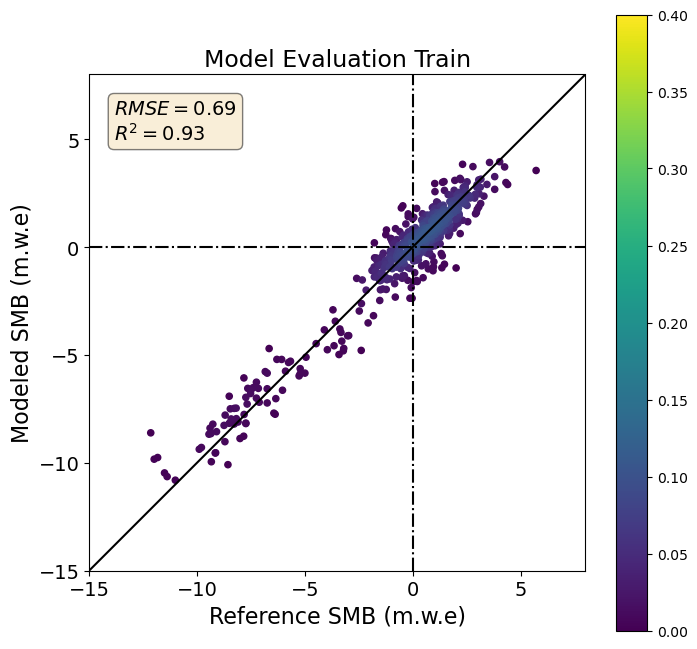

In [66]:
plot_prediction(y_train, reg_linear.predict(X_train_scaled), 'Train', n_toplot=5000)

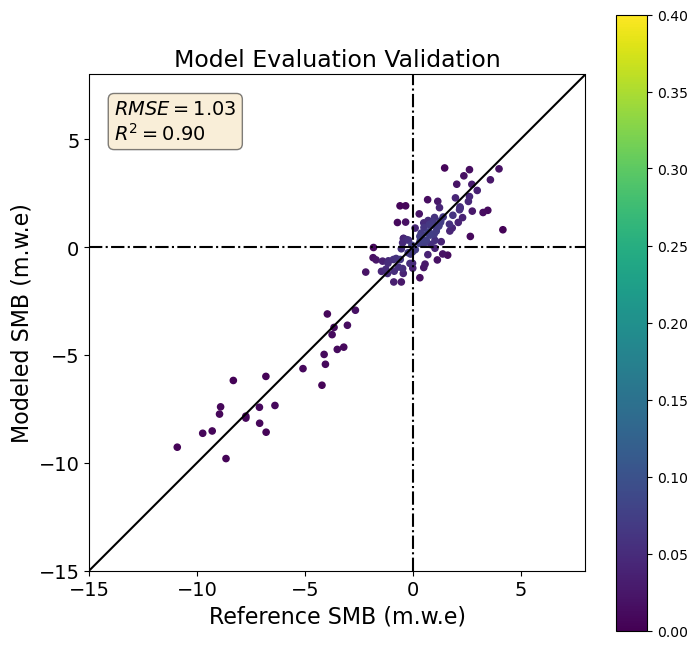

In [67]:
plot_prediction(y_validation, reg_linear.predict(X_validation_scaled), 'Validation', n_toplot=5000)

In [17]:
elastic= ElasticNetCV(l1_ratio = [0.001,0.005,0.01,0.03,0.07,0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9,0.95, 1],
                      alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3,6],
                      max_iter = 50000, 
                      cv = 10,
                      tol=0.001)

elastic.fit(X_train_scaled,y_train)

/home/jovyan/envs/oggm_env/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ElasticNetCV(alphas=[0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03,
                     0.06, 0.1, 0.3, 0.6, 1, 3, 6],
             cv=10,
             l1_ratio=[0.001, 0.005, 0.01, 0.03, 0.07, 0.1, 0.3, 0.5, 0.6, 0.7,
                       0.8, 0.85, 0.9, 0.95, 1],
             max_iter=50000, tol=0.001)

In [18]:
elastic.l1_ratio_, elastic.alpha_

(0.7, 0.003)

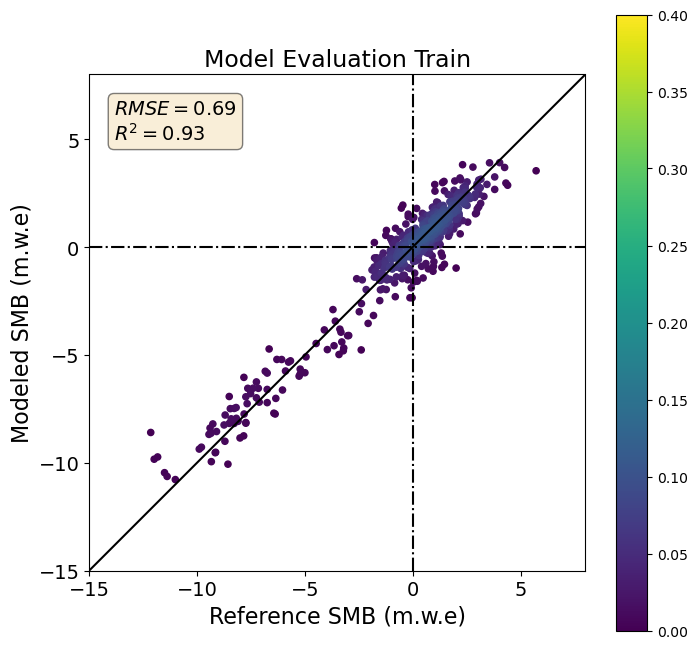

In [68]:
plot_prediction(y_train, elastic.predict(X_train_scaled), 'Train', n_toplot=5000)

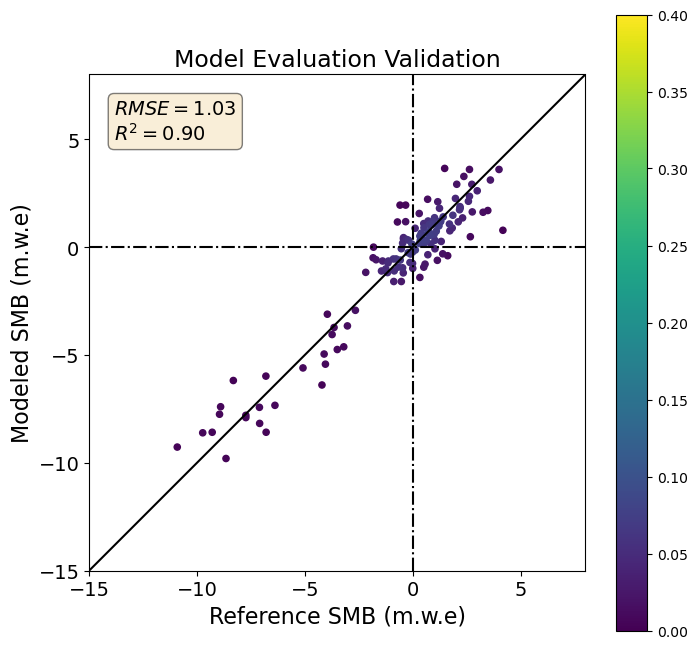

In [69]:
plot_prediction(y_validation, elastic.predict(X_validation_scaled), 'Validation', n_toplot=5000)

**Decision tree**

In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [22]:
%%time
reg_tree = DecisionTreeRegressor(random_state=0, 
                                 max_depth=4, 
                                 min_samples_split=5)

reg_tree.fit(X_train, y_train)

CPU times: user 4.56 ms, sys: 323 µs, total: 4.89 ms
Wall time: 4.31 ms


DecisionTreeRegressor(max_depth=4, min_samples_split=5, random_state=0)

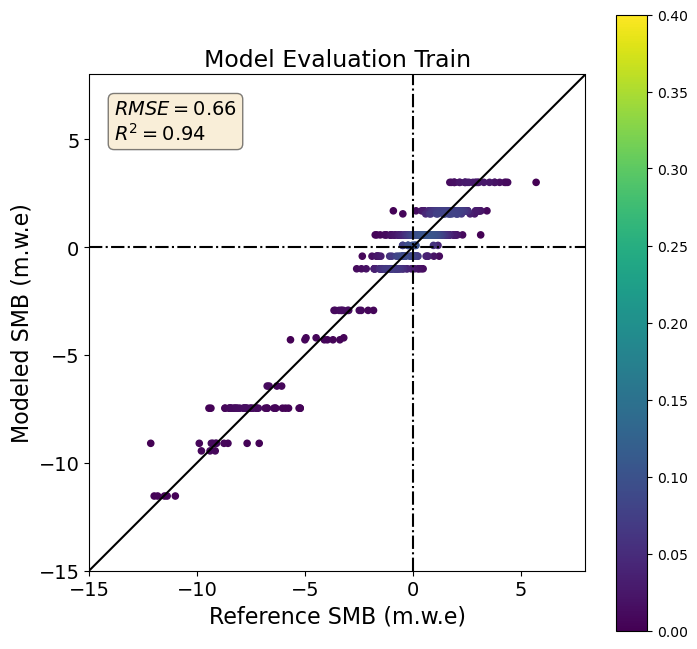

In [70]:
plot_prediction(y_train, reg_tree.predict(X_train), 'Train', n_toplot=5000)

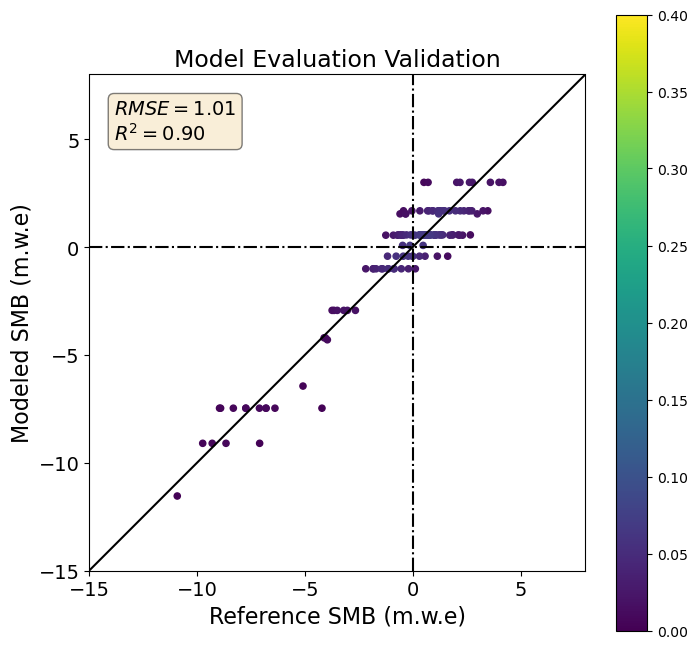

In [71]:
plot_prediction(y_validation, reg_tree.predict(X_validation), 'Validation', n_toplot=5000)

**Ensemble of trees**

In [28]:
from sklearn import ensemble
from sklearn.inspection import permutation_importance

In [95]:
model = 'random forest'
#model = 'gradient boosting'

if model == 'gradient boosting':

    params = {
        "n_estimators": 50,
        "max_depth": 4,
        "min_samples_split": 5,
        "learning_rate": 0.1,
        "loss": 'squared_error',#'huber', #"squared_error",
        "validation_fraction": 0.2
    }
    reg_ensemble = ensemble.GradientBoostingRegressor(**params)
    
elif model == 'random forest':
    
    params = {
        "n_estimators": 100,
        "max_depth": 4,
        "min_samples_split": 5,
        "criterion": "absolute_error",
        'max_features': 30,
    }
    reg_ensemble = ensemble.RandomForestRegressor(**params)

In [96]:
%%time
reg_ensemble.fit(X_train, y_train)

<timed eval>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


CPU times: user 2.04 s, sys: 0 ns, total: 2.04 s
Wall time: 2.04 s


RandomForestRegressor(criterion='absolute_error', max_depth=4, max_features=30,
                      min_samples_split=5)

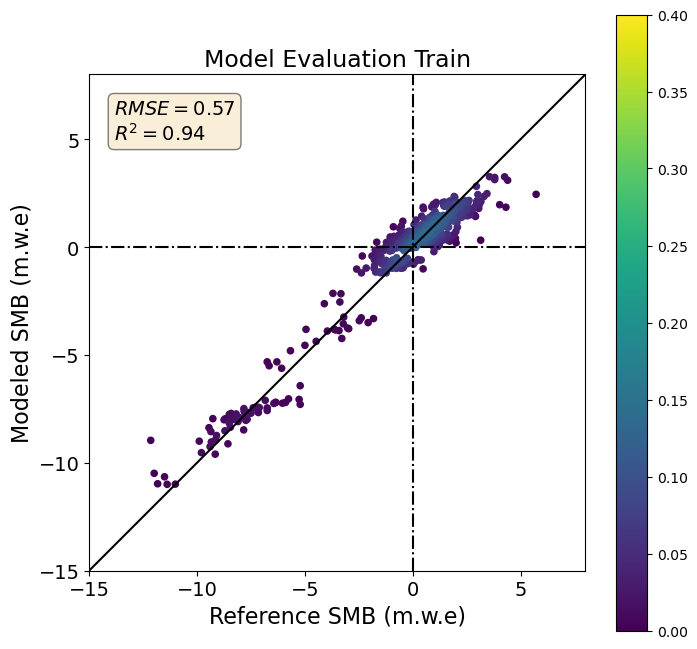

In [97]:
plot_prediction(y_train, reg_ensemble.predict(X_train), 'Train',n_toplot=5000)

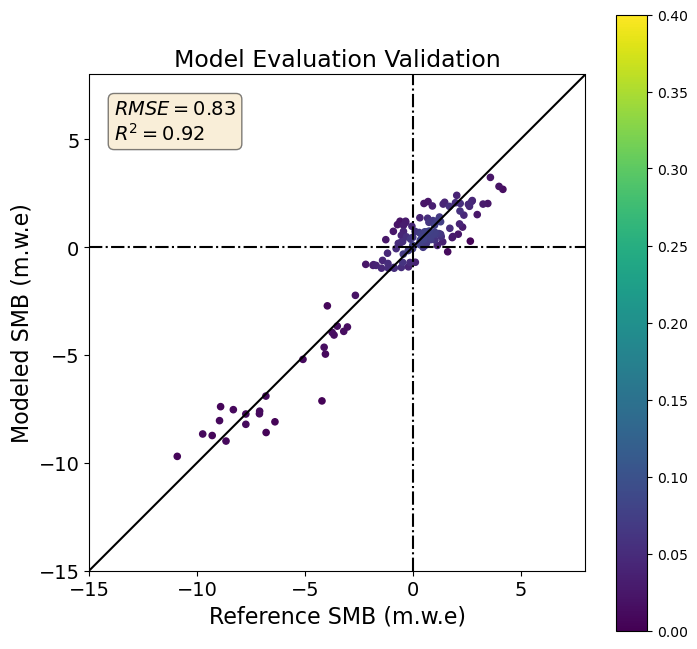

In [99]:
plot_prediction(y_validation, reg_ensemble.predict(X_validation), 'Validation', n_toplot=5000)

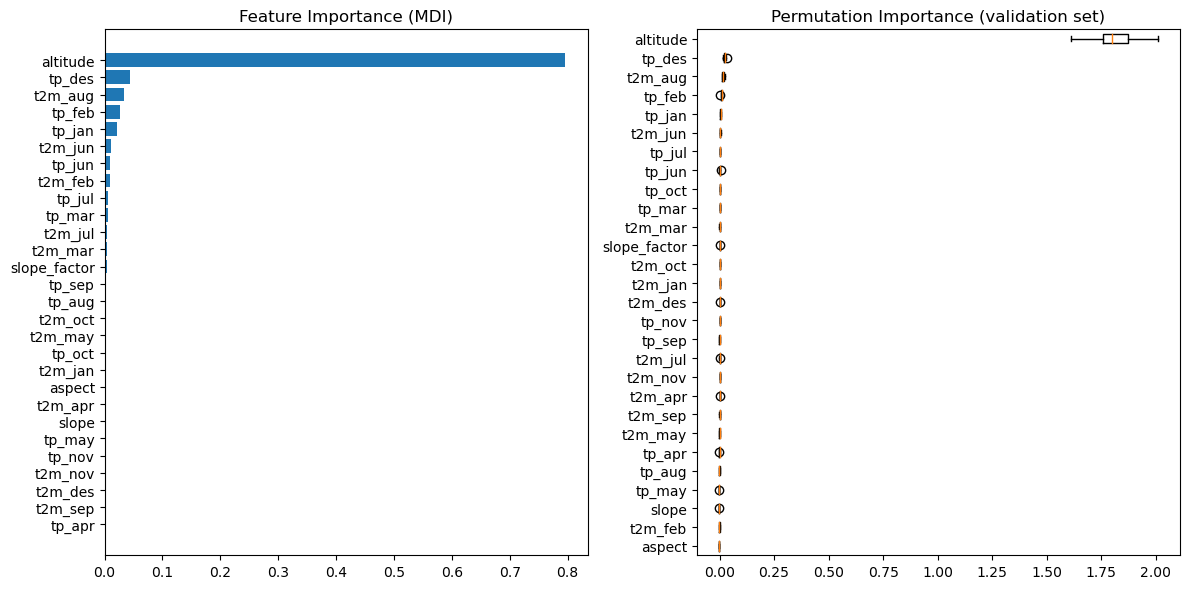

In [100]:
feature_importance = reg_ensemble.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(df_validation_X.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    reg_ensemble, X_validation, y_validation, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(df_validation_X.columns)[sorted_idx],
)
plt.title("Permutation Importance (validation set)")
fig.tight_layout()
plt.show()

**XGBoost**

In [46]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [108]:
# Grid search with range of hyperparameter values to find best performing
# parameter set.

xgb_model = xgb.XGBRegressor()

clf = GridSearchCV(xgb_model, {'max_depth': [2, 3, 4, 5, 6, 7, 8],
                               'n_estimators': [50, 100, 150, 200, 250, 300],
                              'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2]}, 
                   cv=10,
                   verbose=1,
                   n_jobs=4,
                   scoring='neg_mean_squared_error')

# Fit model
clf.fit(X_train, y_train)

print(clf.best_score_)
print(clf.best_params_)

Fitting 10 folds for each of 294 candidates, totalling 2940 fits
-0.4612829088726375
{'learning_rate': 0.15, 'max_depth': 4, 'n_estimators': 200}


In [55]:
#dtrain = xgb.DMatrix(X_train, label=y_train)
#param = {'max_depth':4, 'learning_rate':0.1, 'n_estimators': 200}
#param = {'max_depth':4, 'learning_rate':0.15, 'n_estimators':200}
#num_round = 2

In [109]:
from sklearn.model_selection import cross_val_predict as cvp
from sklearn.model_selection import cross_val_score

xgb_model = xgb.XGBRegressor(max_depth = 4,
                             n_estimators = 200,
                             learning_rate = 0.15)
#res = xgb.cv(param, dtrain, nfold=10,
#             metrics={'error'})#, #seed=0,
             #callbacks=[xgb.callback.EvaluationMonitor(show_stdv=False),
             #           xgb.callback.EarlyStopping(3)])
        
#from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import KFold

# define model evaluation method
#cv = KFold(n_splits=10, random_state=1)
# evaluate model
#scores = cross_val_score(xgb_model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
#scores = absolute(scores)
#print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

print(cross_val_score(xgb_model, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))

y_pred = cvp(xgb_model, X_train, y_train, cv=10, n_jobs = 2)#, fit_params = param)

#xgb_model.fit(X_train, y_train)

[-0.72202208 -0.46383616 -0.42597696 -0.55740687 -0.39310628 -0.37254518
 -0.4926566  -0.42285933 -0.41246812 -0.34995151]


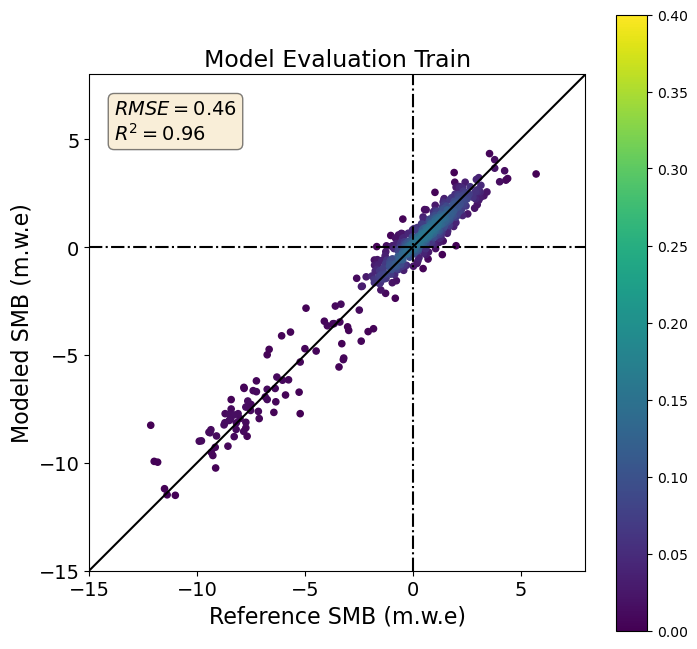

In [110]:
plot_prediction(y_train, y_pred, 'Train', n_toplot=5000)


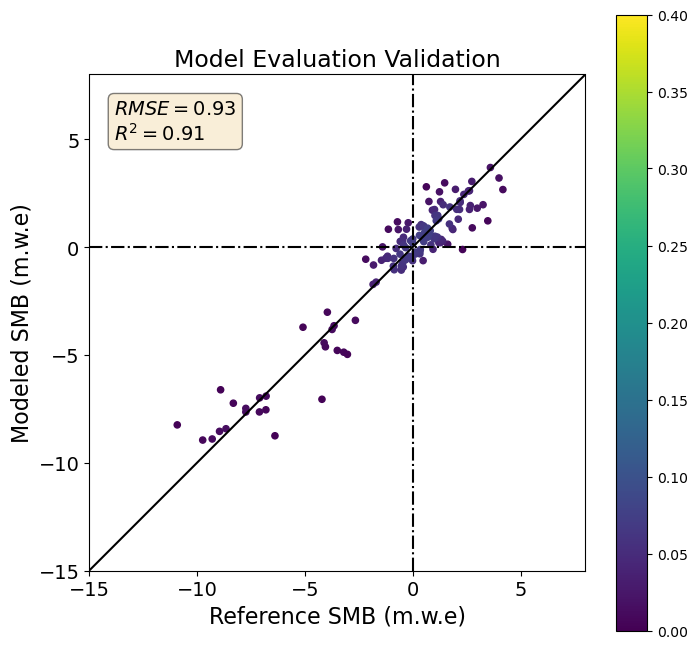

[-1.49845393 -1.1615033  -0.60158447 -1.03936672 -0.83499259 -1.14844282
 -0.80127111 -0.3197249  -0.8057745  -1.06973059]


In [111]:
y_pred_val = cvp(xgb_model, X_validation, y_validation, cv=10, n_jobs = 2)#, fit_params = param)

plot_prediction(y_validation, y_pred_val, 'Validation', n_toplot=5000)

print(cross_val_score(xgb_model, X_validation, y_validation, cv=10, scoring='neg_mean_squared_error'))


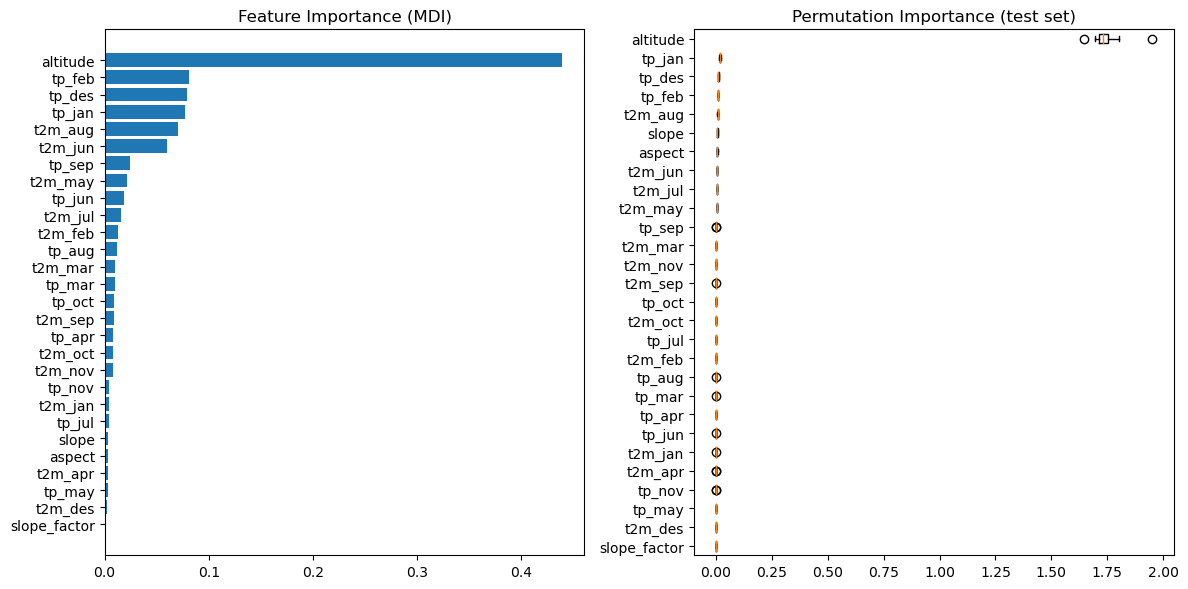

In [113]:
#sorted_idx = xgb_model.feature_importances_.argsort()
#plt.barh(boston.feature_names[sorted_idx], xgb_model.feature_importances_[sorted_idx])
#plt.xlabel("Xgboost Feature Importance")
from sklearn.inspection import permutation_importance


xgb_model.fit(X_train, y_train)
feature_importance = xgb_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(df_train_X.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    xgb_model, X_train, y_train, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(df_train_X.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()